<center><img src="https://e0.365dm.com/21/06/2048x1152/skysports-grpahic-graphic-premier-league_5415970.png"/></center>

<div style="color:white;
           display:fit;
           border-radius:5px;
           background-color:green;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
 Stage 1: Data exploration</h1>
</div>

> **Import the required libraries**

In [87]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
plt.rcParams.update({'figure.max_open_warning': 0})
plt.style.use('ggplot')
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
font = fm.FontProperties(fname=r"C:\Users\YahyaRashwan\OneDrive\Desktop\xxii_arabian_onenightstand\XXII ARABIAN-ONENIGHTSTAND.ttf")

> * **Show the first 5 rows**

In [88]:
df = pd.read_csv('EPL_20_21.csv')
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


> **Summary of the dataset**

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

> * **Number of rows and columns in the dataset**

In [90]:
df.shape

(532, 18)

> **Columns names**

In [91]:
df.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards'],
      dtype='object')

> **Number of rows and columns in the dataset**

In [92]:
df.nunique()

Name                     524
Club                      20
Nationality               59
Position                  10
Age                       23
Matches                   38
Starts                    39
Mins                     458
Goals                     21
Assists                   13
Passes_Attempted         449
Perc_Passes_Completed    261
Penalty_Goals              9
Penalty_Attempted          8
xG                        61
xA                        37
Yellow_Cards              13
Red_Cards                  3
dtype: int64

> **Descriptive statistics about the dataset**

In [93]:
df.select_dtypes(include='float').describe().T

,count,mean,std,min,25%,50%,75%,max
Perc_Passes_Completed,532.0,77.823872,13.011631,-1.0,73.50,79.20,84.625,100.00
xG,532.0,0.113289,0.148174,0.0,0.01,0.06,0.150,1.16
xA,532.0,0.072650,0.090072,0.0,0.00,0.05,0.110,0.90


In [94]:
df.select_dtypes(include='int64').describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='flare')

,count,mean,std,min,25%,50%,75%,max
Age,532.000000,25.500000,4.319404,16.000000,22.000000,26.000000,29.000000,38.000000
Matches,532.000000,19.535714,11.840459,1.000000,9.000000,21.000000,30.000000,38.000000
Starts,532.000000,15.714286,11.921161,0.000000,4.000000,15.000000,27.000000,38.000000
Mins,532.000000,1411.443609,1043.171856,1.000000,426.000000,1345.000000,2303.500000,3420.000000
Goals,532.000000,1.853383,3.338009,0.000000,0.000000,1.000000,2.000000,23.000000
Assists,532.000000,1.287594,2.095191,0.000000,0.000000,0.000000,2.000000,14.000000
Passes_Attempted,532.000000,717.750000,631.372522,0.000000,171.500000,573.500000,1129.500000,3214.000000
Penalty_Goals,532.000000,0.191729,0.850881,0.000000,0.000000,0.000000,0.000000,9.000000
Penalty_Attempted,532.000000,0.234962,0.975818,0.000000,0.000000,0.000000,0.000000,10.000000
Yellow_Cards,532.000000,2.114662,2.269094,0.000000,0.000000,2.000000,3.000000,12.000000


In [95]:
df.select_dtypes(include='object').describe().T.style.background_gradient(cmap='PuBu')

,count,unique,top,freq
Name,532,524,Mathew Ryan,2
Club,532,20,West Bromwich Albion,30
Nationality,532,59,ENG,192
Position,532,10,DF,178


* **Correlation**

In [96]:
df.corr()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
Age,1.000000,0.149628,0.156387,0.158643,0.047022,0.026740,0.120244,0.122812,0.084547,0.083328,-0.056098,-0.047849,0.115191,0.065414
Matches,0.149628,1.000000,0.938116,0.947351,0.441977,0.508009,0.785362,0.085462,0.227929,0.234389,0.192047,0.227570,0.578093,0.168281
Starts,0.156387,0.938116,1.000000,0.997031,0.405381,0.477704,0.853448,0.086039,0.216877,0.221418,0.072487,0.113446,0.603497,0.195383
Mins,0.158643,0.947351,0.997031,1.000000,0.400398,0.474677,0.855600,0.085460,0.219027,0.224115,0.075016,0.117602,0.604634,0.193038
Goals,0.047022,0.441977,0.405381,0.400398,1.000000,0.617831,0.201526,-0.025137,0.594730,0.590492,0.681959,0.348428,0.104413,0.057785
Assists,0.026740,0.508009,0.477704,0.474677,0.617831,1.000000,0.393906,-0.016645,0.408459,0.411784,0.383358,0.558677,0.213691,-0.020855
Passes_Attempted,0.120244,0.785362,0.853448,0.855600,0.201526,0.393906,1.000000,0.228393,0.149533,0.157020,-0.092535,0.105132,0.634567,0.208003
Perc_Passes_Completed,0.122812,0.085462,0.086039,0.085460,-0.025137,-0.016645,0.228393,1.000000,-0.024517,-0.014934,-0.035313,0.047720,0.162451,0.054068
Penalty_Goals,0.084547,0.227929,0.216877,0.219027,0.594730,0.408459,0.149533,-0.024517,1.000000,0.982176,0.407251,0.205417,0.057846,0.021109
Penalty_Attempted,0.083328,0.234389,0.221418,0.224115,0.590492,0.411784,0.157020,-0.014934,0.982176,1.000000,0.420159,0.218949,0.063506,0.031073


* **Number of duplicated values**

In [97]:
df.duplicated().sum()

0

* **Number of NaN values in each column**

In [98]:
df.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
Stage 2: Data Assessing
</h1>
</div>

> * **Content issues detected**

**Data Entry Errors** :

* `Perc_Passes_Completed` column : There are some values with -1 % , which is not reasonable value.

In [99]:
df.loc[df.Perc_Passes_Completed==-1]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
182,Dane Scarlett,Tottenham Hotspur,ENG,FW,16,1,0,1,0,0,0,-1.0,0,0,0.0,0.0,0,0
531,Femi Seriki,Sheffield United,ENG,DF,17,1,0,1,0,0,0,-1.0,0,0,0.0,0.0,0,0


* `Position` column: There are some values with the same positions, but in different order. These values need to be normalized.

In [100]:
df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

* `Name` column: Some players appeared 2 time in the dataset

In [101]:
df['Name'].value_counts().nlargest(8)

Mathew Ryan               2
Robert Snodgrass          2
Ainsley Maitland-Niles    2
Joe Willock               2
Theo Walcott              2
Takumi Minamino           2
Ruben Loftus-Cheek        2
Ross Barkley              2
Name: Name, dtype: int64

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
Stage 3: Data Manipulation
</h1>
</div>

> `Perc_Passes_Completed` column :

> `Position` column:

In [102]:
df['Position'].replace(['FW,DF','MF,DF','FW,MF'],['DF,FW','DF,MF','MF,FW'],inplace=True)

In [103]:
print(df['Position'].unique())

['MF,FW' 'GK' 'FW' 'DF' 'MF' 'DF,FW' 'DF,MF']


> `Name` column:

In [104]:
x= df['Name'].value_counts().sort_values(ascending=False).nlargest(8).index.tolist()
print('Transfers: ',x)
for player in x:
    display(pd.DataFrame(df.loc[df.Name==player].reset_index(drop=True)))

Transfers:  ['Mathew Ryan', 'Robert Snodgrass', 'Ainsley Maitland-Niles', 'Joe Willock', 'Theo Walcott', 'Takumi Minamino', 'Ruben Loftus-Cheek', 'Ross Barkley']


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mathew Ryan,Arsenal,AUS,GK,28,3,3,270,0,0,67,92.5,0,0,0.0,0.0,0,0
1,Mathew Ryan,Brighton,AUS,GK,28,11,11,990,0,0,399,78.7,0,0,0.0,0.0,1,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Robert Snodgrass,West Ham United,SCO,"DF,FW",32,3,0,5,0,0,3,100.0,0,0,0.00,0.00,0,0
1,Robert Snodgrass,West Bromwich Albion,SCO,"MF,FW",32,8,6,526,0,0,133,78.9,0,0,0.03,0.06,2,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Ainsley Maitland-Niles,Arsenal,ENG,DF,22,11,5,490,0,0,288,78.5,0,0,0.02,0.04,0,0
1,Ainsley Maitland-Niles,West Bromwich Albion,ENG,MF,22,15,14,1230,0,0,402,76.4,0,0,0.05,0.05,2,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Joe Willock,Arsenal,ENG,MF,20,7,2,238,0,0,91,75.8,0,0,0.17,0.02,1,0
1,Joe Willock,Newcastle United,ENG,MF,20,14,11,978,8,0,235,77.0,0,1,0.33,0.07,0,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Theo Walcott,Everton,ENG,FW,31,1,0,13,0,0,1,100.0,0,0,0.00,0.00,0,0
1,Theo Walcott,Southampton,ENG,"MF,FW",31,21,20,1618,3,3,424,72.4,0,0,0.17,0.07,0,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Takumi Minamino,Liverpool FC,JPN,"MF,FW",25,9,2,293,1,0,139,79.9,0,0,0.20,0.00,0,0
1,Takumi Minamino,Southampton,JPN,"MF,FW",25,10,9,711,2,0,257,72.4,0,0,0.15,0.07,1,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0
1,Ruben Loftus-Cheek,Fulham,ENG,"MF,FW",24,30,21,1909,1,0,716,83.1,0,0,0.15,0.07,3,0


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Ross Barkley,Chelsea,ENG,MF,26,2,0,42,0,0,26,84.6,0,0,0.06,0.16,0,0
1,Ross Barkley,Aston Villa,ENG,MF,26,24,18,1531,3,1,764,81.0,0,0,0.19,0.21,0,0


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:purple;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:black">
Stage 4: Exploratory Data Analysis 
</h1>
</div>

<center><img src="https://resources.premierleague.com/photos/2020/03/11/dccc9141-4639-4f1c-941c-14dbea298bf1/ePL_TheFinals-Editorial-Lead.png?width=930&height=620"/></center>

## League stats

* Research Questions :

    *   Which team scored the most goals during the season?

    *   which team made the most number of assisits?

    *   which team had the biggest number of passes attempted?

    *   which team scored penalties more than the others in the league?

    *   which team  missed the biggest number of penalties during the season?

    *   Which team have the most aggresive players in the EPL?

,Club,Goals
0,Manchester City,82
1,Manchester United,70
2,Tottenham Hotspur,66
3,Liverpool FC,65
4,Leicester City,64
5,Leeds United,60
6,West Ham United,60
7,Chelsea,56
8,Arsenal,53
9,Aston Villa,52


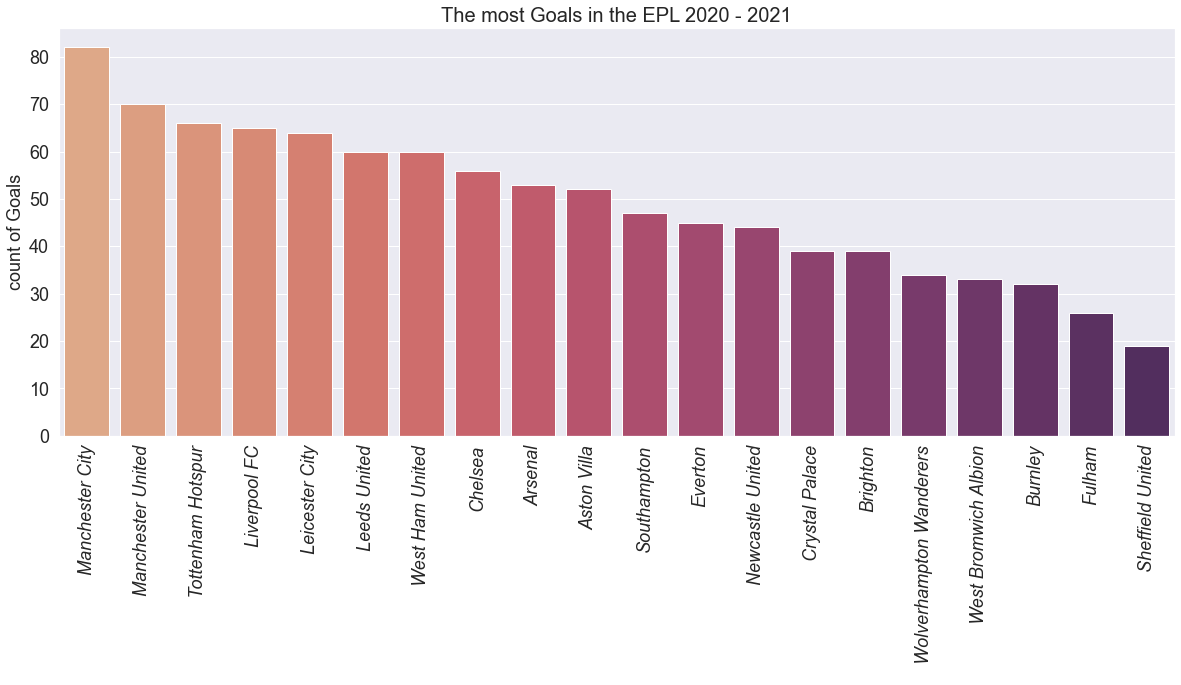

,Club,Assists
0,Manchester City,55
1,Manchester United,51
2,Tottenham Hotspur,50
3,West Ham United,46
4,Leeds United,45
5,Leicester City,45
6,Liverpool FC,43
7,Aston Villa,38
8,Arsenal,38
9,Chelsea,38


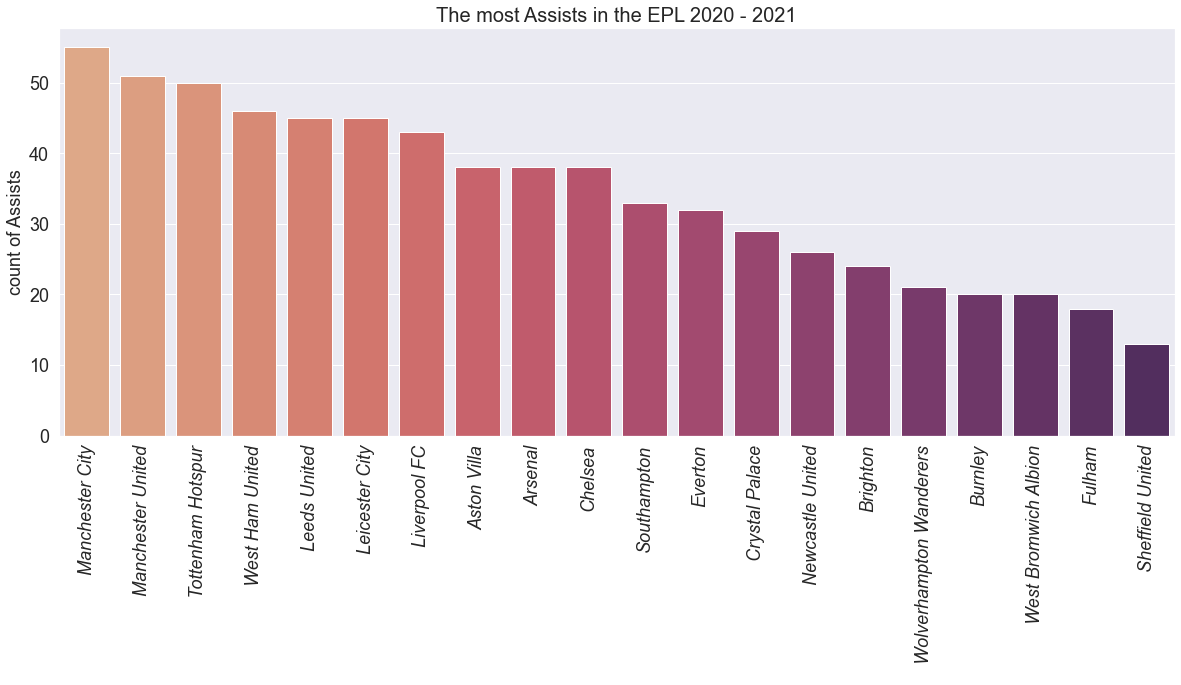

,Club,Passes_Attempted
0,Manchester City,26688
1,Liverpool FC,25526
2,Chelsea,25151
3,Manchester United,21960
4,Arsenal,21291
5,Leicester City,20572
6,Leeds United,20043
7,Tottenham Hotspur,19872
8,Brighton,19456
9,Fulham,18860


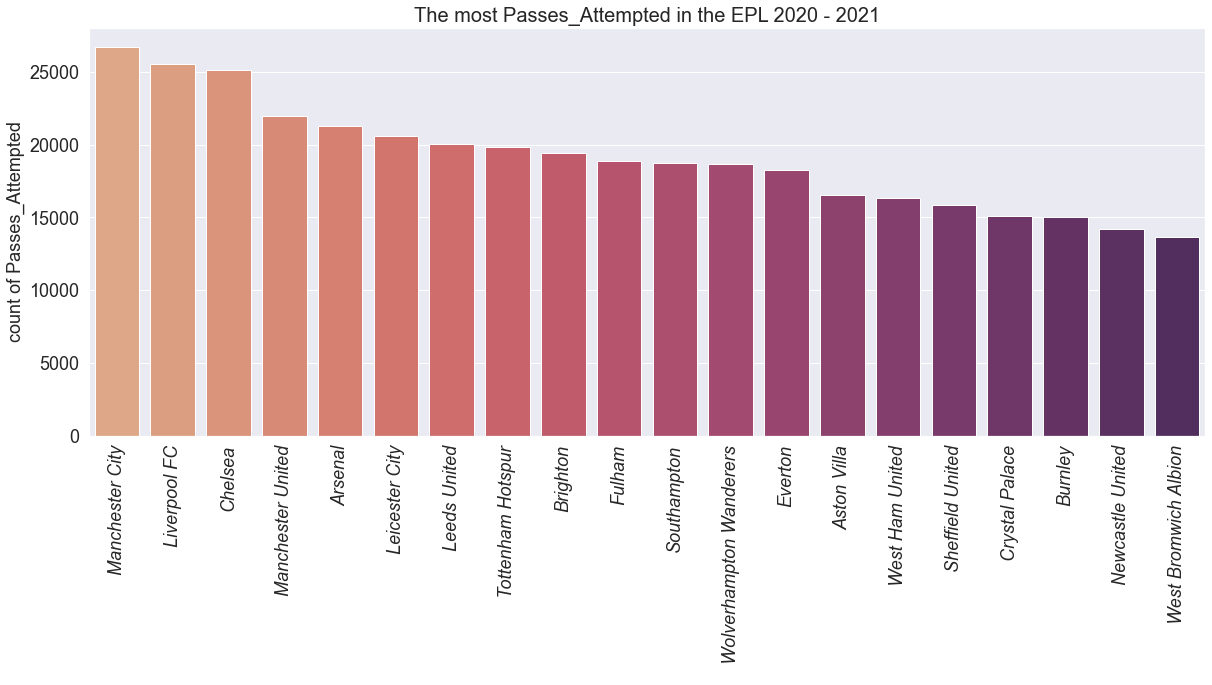

,Club,Penalty_Goals
0,Leicester City,10
1,Manchester United,10
2,Chelsea,8
3,Arsenal,6
4,Newcastle United,6
5,Liverpool FC,6
6,Brighton,6
7,Aston Villa,5
8,Manchester City,5
9,Southampton,5


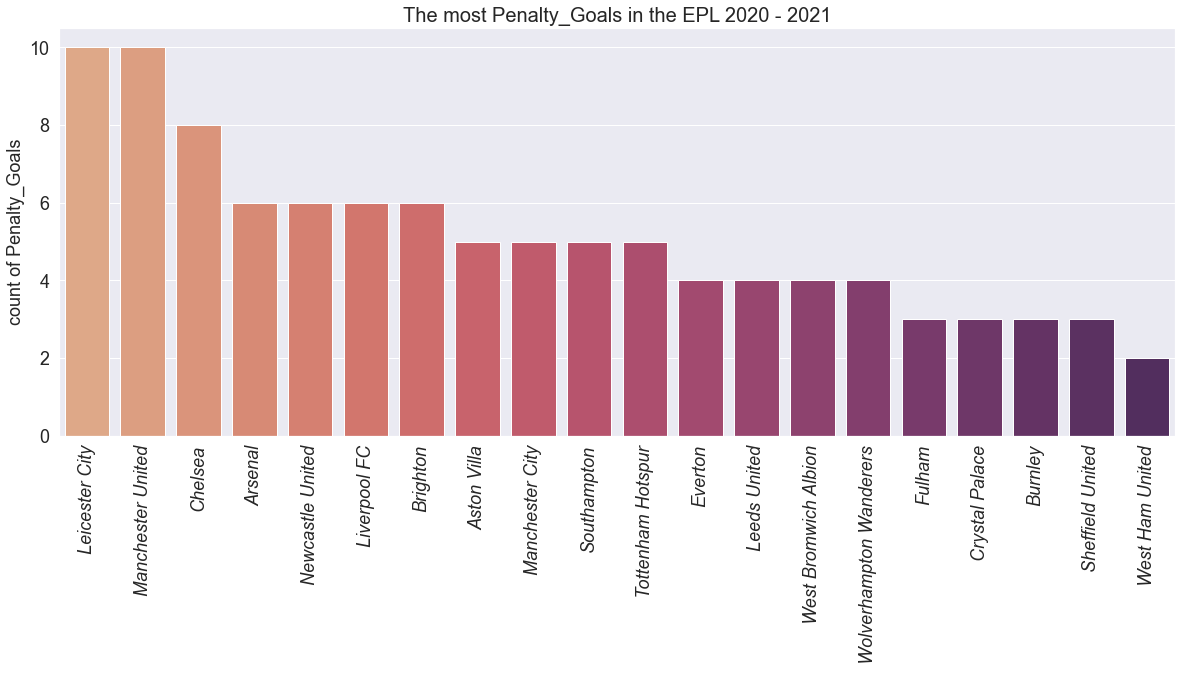

,Club,Penalty_Attempted
0,Leicester City,12
1,Manchester United,11
2,Chelsea,10
3,Brighton,9
4,Manchester City,9
5,Newcastle United,7
6,Arsenal,6
7,Southampton,6
8,Aston Villa,6
9,Liverpool FC,6


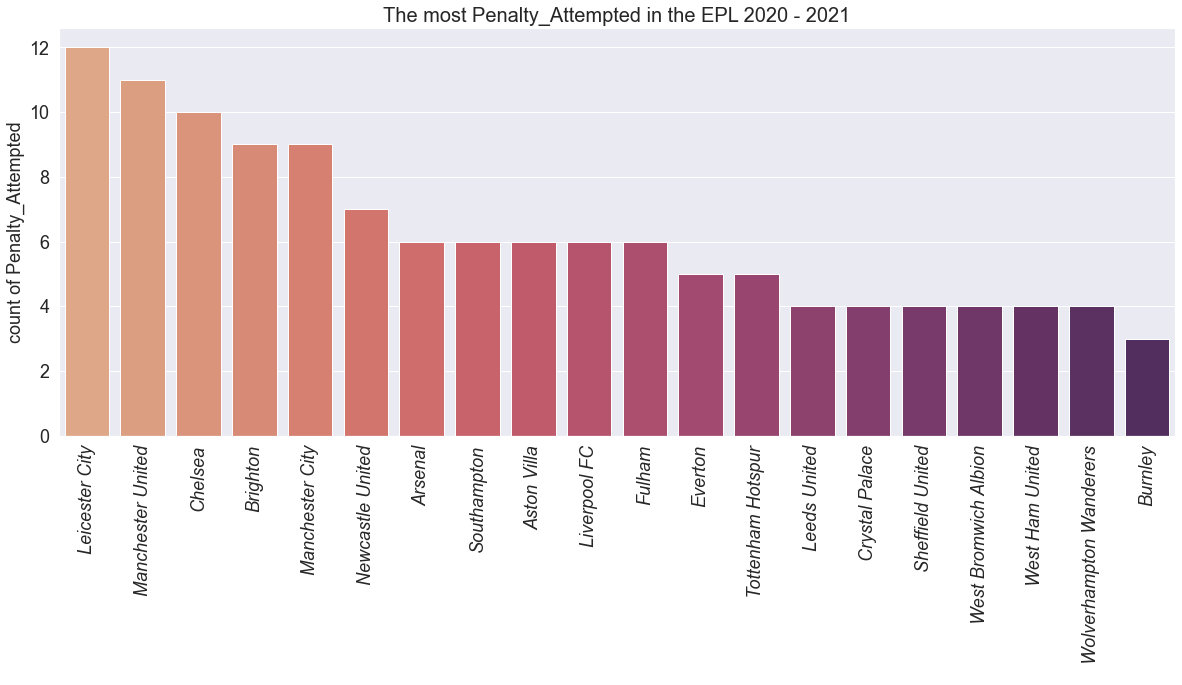

,Club,Yellow_Cards
0,Sheffield United,73
1,Aston Villa,71
2,Fulham,67
3,Newcastle United,65
4,Manchester United,64
5,Leeds United,61
6,Leicester City,61
7,Everton,59
8,Tottenham Hotspur,57
9,Crystal Palace,56


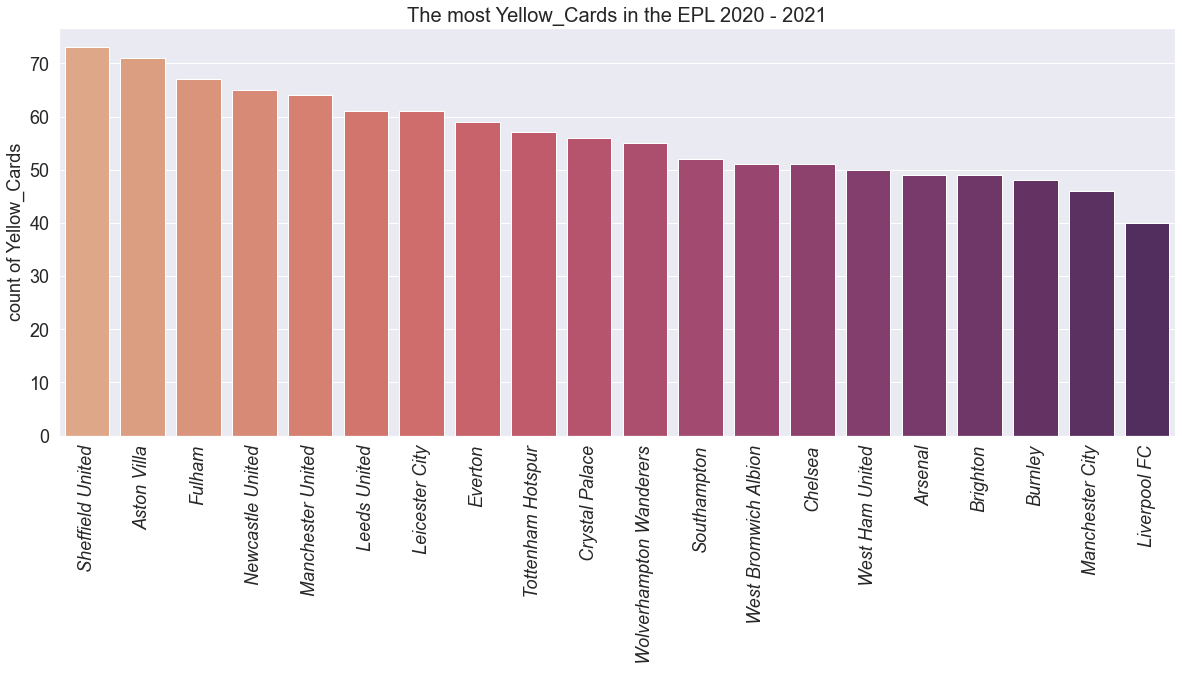

,Club,Red_Cards
0,Brighton,6
1,Arsenal,5
2,West Bromwich Albion,4
3,Aston Villa,4
4,Sheffield United,3
5,West Ham United,3
6,Chelsea,3
7,Fulham,3
8,Southampton,3
9,Newcastle United,3


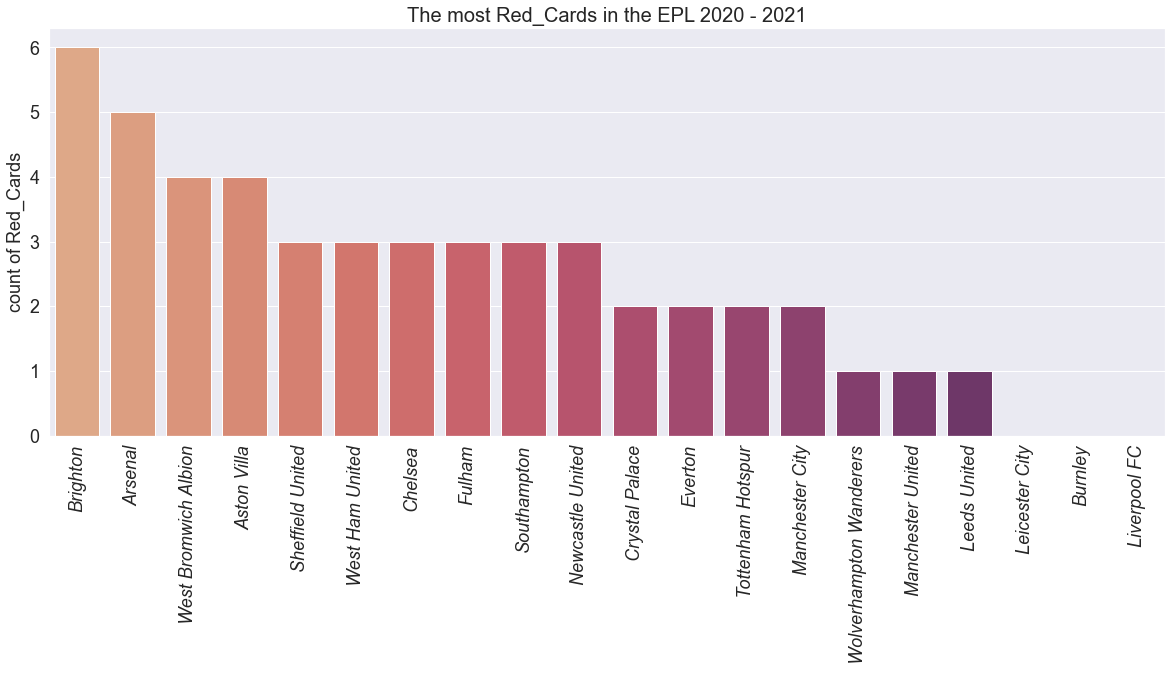

In [105]:
v = ['Goals','Assists','Passes_Attempted','Penalty_Goals','Penalty_Attempted','Yellow_Cards','Red_Cards']
for colname in v:
    x = x=pd.DataFrame(df.groupby(['Club'])[colname].sum().reset_index(drop=False).sort_values(by=colname,ascending=False).reset_index(drop=True))
    display(x)
    sns.set(rc={'figure.figsize':(20,7.5)})
    sns.barplot(x='Club',y=colname,data=x,palette="flare")
    plt.title('The most {} in the EPL 2020 - 2021'.format(colname),fontsize=20)
    plt.xlabel(' ')
    plt.ylabel('count of {}'.format(colname),fontsize=18)
    plt.xlabel(' ')
    plt.xticks(ticks=np.arange(0,20,1),labels=x['Club'],fontsize=18,style='oblique',rotation=90)
    plt.yticks(fontsize=18)
    plt.show()

## Player Stats

<center><img src="https://footballbh.net/wp-content/uploads/2021/01/premier-league.png"/></center>

* Research Questions :

    *   Who scored the most goals during the season?

    *   Who made the most number of assisits?

    *   Who had the biggest number of passes attempted?

    *   Who scored penalties more than other players?

    *   Who missed the biggest number of penalties during the season?

    *   Who are the most aggresive players in the EPL?

,Name,Club,Goals
0,Harry Kane,Tottenham Hotspur,23
1,Mohamed Salah,Liverpool FC,22
2,Bruno Fernandes,Manchester United,18
3,Patrick Bamford,Leeds United,17
4,Son Heung-min,Tottenham Hotspur,17
5,Dominic Calvert-Lewin,Everton,16
6,Jamie Vardy,Leicester City,15
7,Ollie Watkins,Aston Villa,14
8,İlkay Gündoğan,Manchester City,13
9,Alexandre Lacazette,Arsenal,13


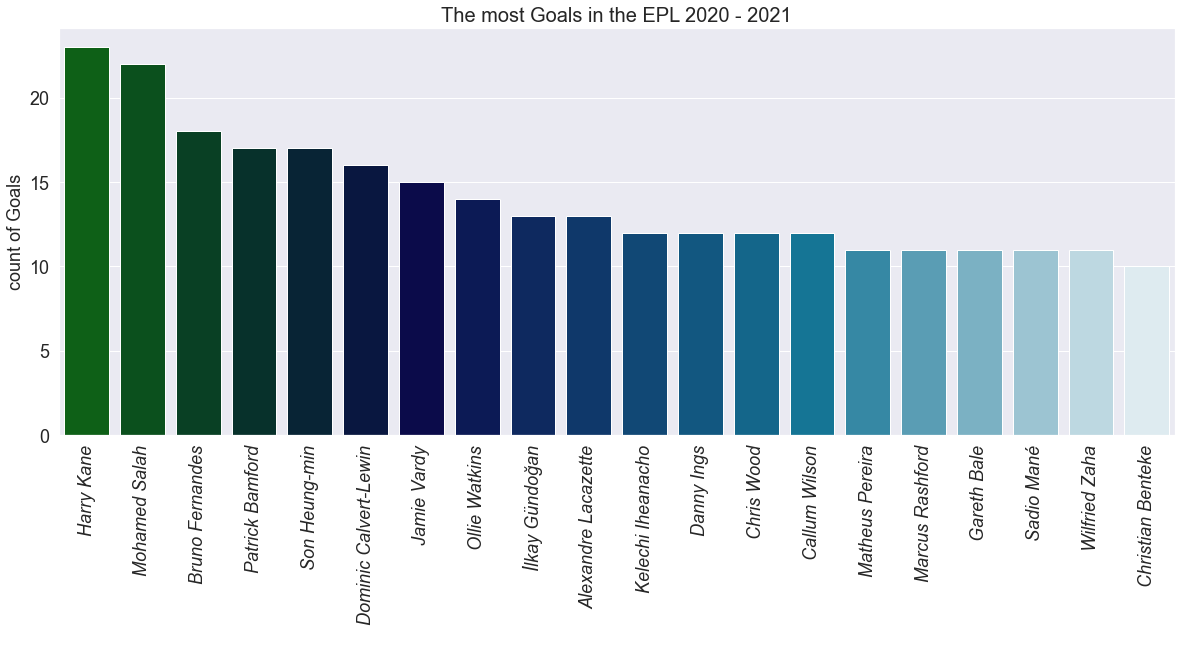

,Name,Club,Assists
0,Harry Kane,Tottenham Hotspur,14
1,Bruno Fernandes,Manchester United,12
2,Kevin De Bruyne,Manchester City,12
3,Son Heung-min,Tottenham Hotspur,10
4,Jack Grealish,Aston Villa,10
5,Jamie Vardy,Leicester City,9
6,Raphael Dias Belloli,Leeds United,9
7,Marcus Rashford,Manchester United,9
8,Aaron Cresswell,West Ham United,8
9,Jack Harrison,Leeds United,8


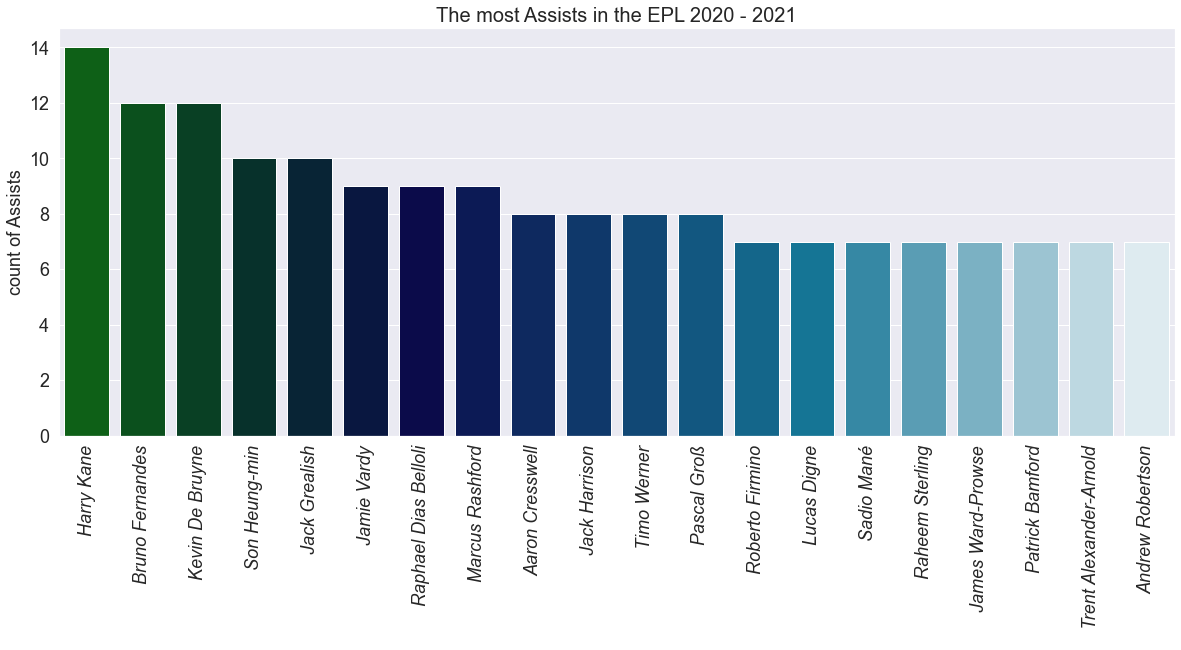

,Name,Club,Passes_Attempted
0,Andrew Robertson,Liverpool FC,3214
1,Trent Alexander-Arnold,Liverpool FC,2941
2,Rodri,Manchester City,2728
3,Pierre Højbjerg,Tottenham Hotspur,2687
4,Rúben Dias,Manchester City,2671
5,Luke Ayling,Leeds United,2661
6,James Ward-Prowse,Southampton,2619
7,Youri Tielemans,Leicester City,2559
8,Bruno Fernandes,Manchester United,2283
9,Stuart Dallas,Leeds United,2212


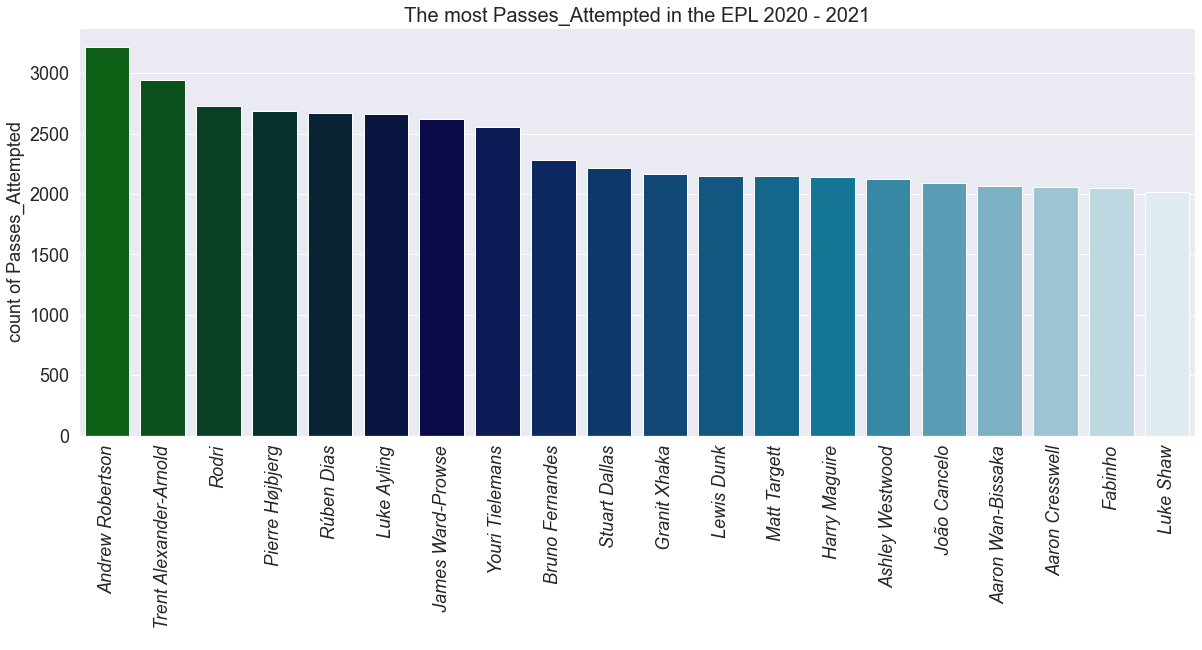

,Name,Club,Penalty_Goals
0,Bruno Fernandes,Manchester United,9
1,Jamie Vardy,Leicester City,8
2,Jorginho,Chelsea,7
3,Mohamed Salah,Liverpool FC,6
4,Harry Kane,Tottenham Hotspur,4
5,Callum Wilson,Newcastle United,4
6,Anwar El Ghazi,Aston Villa,4
7,Matheus Pereira,West Bromwich Albion,4
8,Alexandre Lacazette,Arsenal,3
9,Neal Maupay,Brighton,3


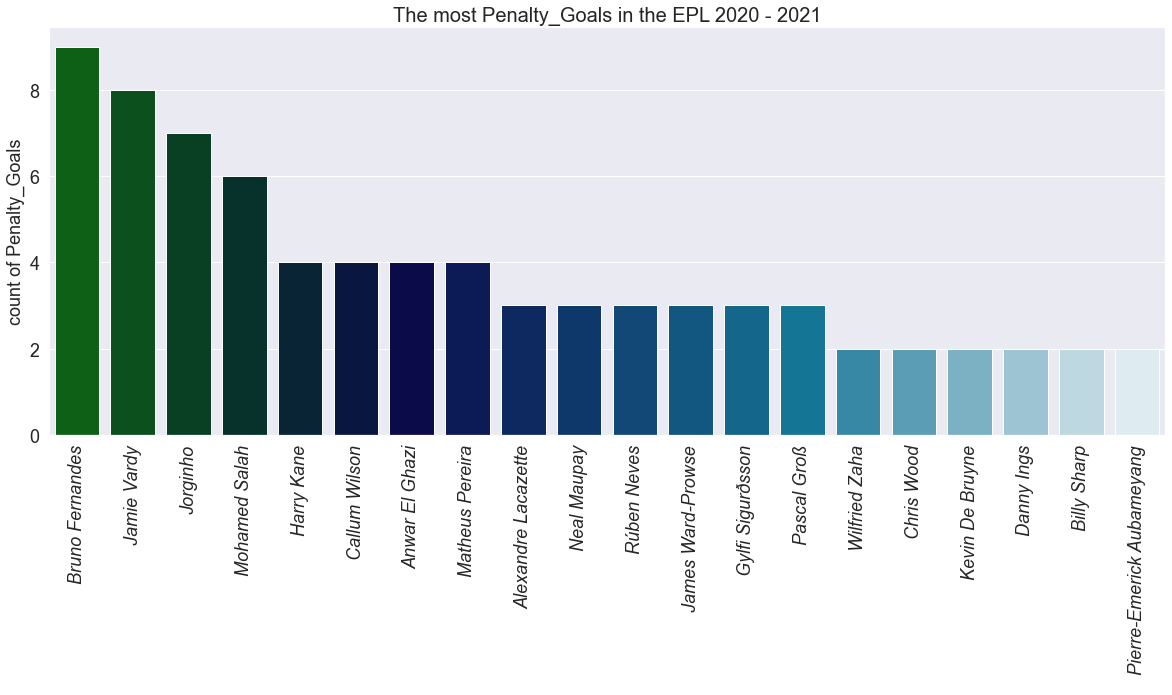

,Name,Club,Penalty_Attempted
0,Bruno Fernandes,Manchester United,10
1,Jorginho,Chelsea,9
2,Jamie Vardy,Leicester City,9
3,Mohamed Salah,Liverpool FC,6
4,Gylfi Sigurðsson,Everton,4
5,Matheus Pereira,West Bromwich Albion,4
6,Anwar El Ghazi,Aston Villa,4
7,Callum Wilson,Newcastle United,4
8,James Ward-Prowse,Southampton,4
9,Neal Maupay,Brighton,4


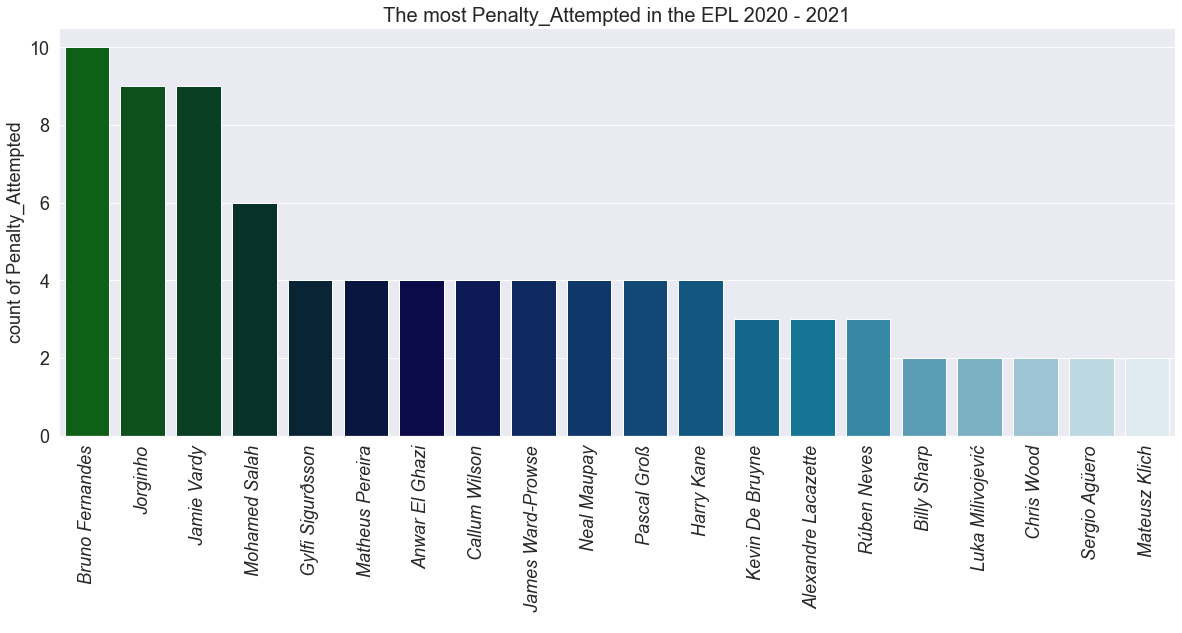

,Name,Club,Yellow_Cards
0,John McGinn,Aston Villa,12
1,Conor Gallagher,West Bromwich Albion,11
2,Harry Maguire,Manchester United,11
3,Kalvin Phillips,Leeds United,10
4,Douglas Luiz,Aston Villa,10
5,Mason Holgate,Everton,9
6,Pierre Højbjerg,Tottenham Hotspur,9
7,Matty Cash,Aston Villa,8
8,Isaac Hayden,Newcastle United,8
9,Luke Shaw,Manchester United,8


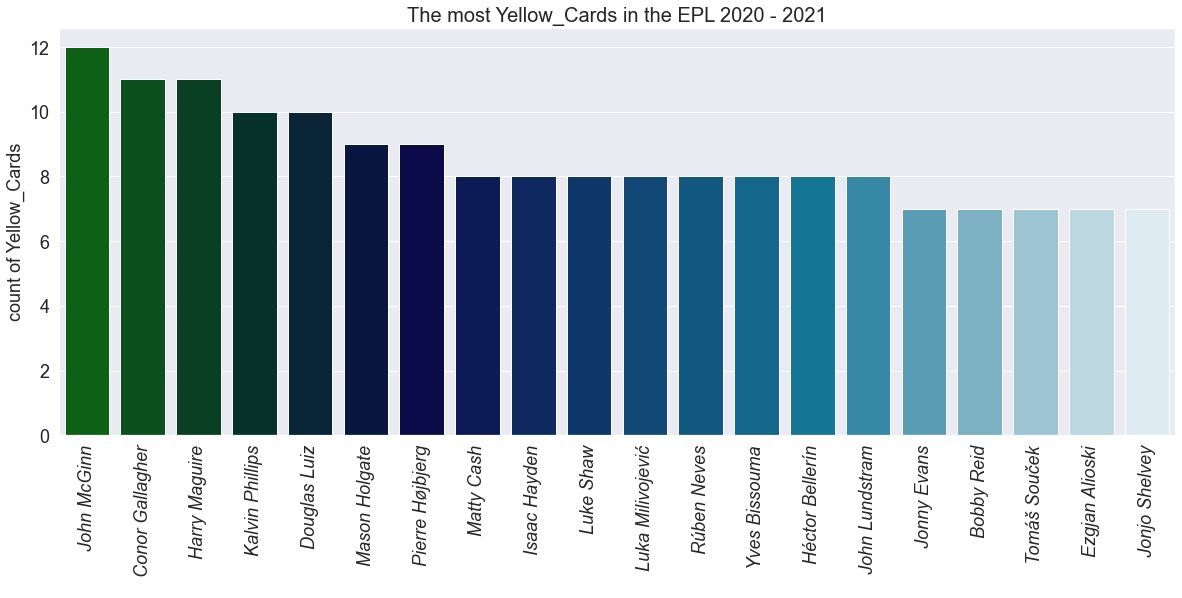

,Name,Club,Red_Cards
0,Lewis Dunk,Brighton,2
1,Liam Cooper,Leeds United,1
2,Phil Jagielka,Sheffield United,1
3,Gabriel Dos Santos,Arsenal,1
4,Tyrone Mings,Aston Villa,1
5,Jannik Vestergaard,Southampton,1
6,Andreas Christensen,Chelsea,1
7,Ollie Watkins,Aston Villa,1
8,John Egan,Sheffield United,1
9,Neal Maupay,Brighton,1


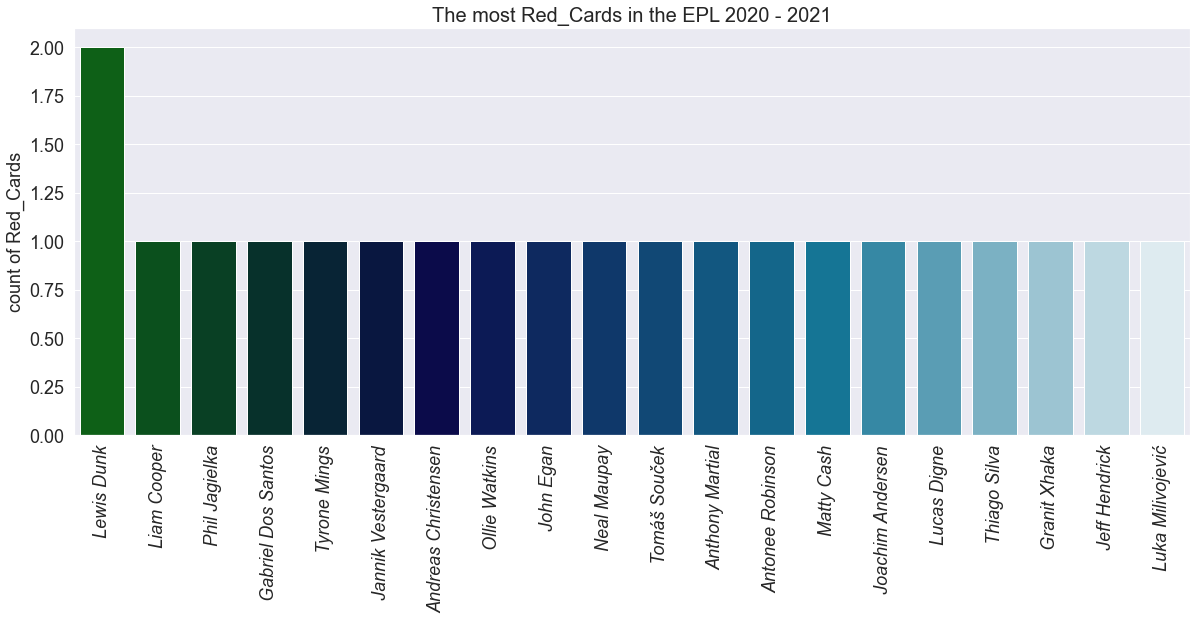

In [86]:
v = ['Goals','Assists','Passes_Attempted','Penalty_Goals','Penalty_Attempted','Yellow_Cards','Red_Cards']
for colname in v:
    x = x=pd.DataFrame(df.groupby(['Name','Club'])[colname].sum().reset_index(drop=False).sort_values(by=colname,ascending=False).head(20).reset_index(drop=True))
    display(x)
    sns.set(rc={'figure.figsize':(20,7.5)})
    sns.barplot(x='Name',y=colname,data=x,palette="ocean",order=x['Name'].tail(20))
    plt.title('The most {} in the EPL 2020 - 2021'.format(colname),fontsize=20)
    plt.ylabel('count of {}'.format(colname),fontsize=18)
    plt.xlabel(' ')
    plt.xticks(ticks=np.arange(0,20,1),labels=x['Name'],fontsize=18,style='oblique',rotation=90)
    plt.yticks(fontsize=18)
    plt.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
Final Conclusion
</h1>
</div>

## The most goals scored:

<center><img src="https://cf-images.eu-west-1.prod.boltdns.net/v1/static/2508689025001/4073be07-47cc-470d-9f16-085810b1f3e0/13284235-78ca-4c20-b9f1-67e28f225812/1280x720/match/image.jpg"/></center>

<center><img src="https://www.sportco.io/images/post/GC_1607678890.jpeg"/></center>

## The most number of passes attempted

<center><img src="https://www.thisisanfield.com/wp-content/uploads/P2020-09-12-Liverpool_Leeds-97.jpg"/></center>

<center><img src="https://images.daznservices.com/di/library/GOAL/ec/c0/ruben-dias-manchester-city-2020-21_1try2ga4ablvt1hfyvcv2e4hec.png?t=-622001657&quality=100"/></center>

## The most number of penalties

<center><img src="https://imgresizer.eurosport.com/unsafe/1200x0/filters:format(jpeg):focal(1286x246:1288x244)/origin-imgresizer.eurosport.com/2020/11/23/2941943-60394828-2560-1440.jpg"/></center>

<center><img src="https://www.belfasttelegraph.co.uk/sport/football/premier-league/93d88/39883576.ece/AUTOCROP/w1240h700/bpanews_8f64ec44-1daf-4c0f-b828-c47bf3b584eb_1"/></center>

## The most aggresive

<center><img src="https://www.nottheoldfirm.com/static/uploads/15/2021/01/GettyImages-1294045073-1440x1030.jpg"/></center>

<center><img src="https://i2-prod.sussexlive.co.uk/sport/football/football-news/article4618415.ece/ALTERNATES/s1200c/0_GettyImages-1280910682jpgs.jpg"/></center>

## Special moments

<center><img src="https://ftw.usatoday.com/wp-content/uploads/sites/90/2021/05/AFP_9A467P.jpg?w=1000&h=600&crop=1"/></center>